# Résolution numérique d'une équation différentielle d'ordre 1

__But :__ mettre en œuvre la méthode d’Euler à l’aide d’un langage de programmation pour simuler la réponse d’un système linéaire du premier ordre à une excitation de forme quelconque.

## Rappels sur la méthode d'Euler

La _méthode d'Euler_ est une méthode numérique d'intégration d'une équation différentielle.

### Position du problème.
Un équation différentielle d'ordre 1 peut se mettre sous la forme :

$$
\frac{\rm{d}y}{\rm{dt}}(t) = f(t, y)
$$
avec $y(t_0) = y_0$

où $y$ est la fonction inconnue.

> Exemple : Pour un circuit RC série relié à une tension de tension $E(t)$, l'équation d'évolution est :
> 
> $$\frac{\rm{d}u}{\rm{dt}} = \frac{1}{RC}\left (E(t) - u(t) \right )$$
> 
> La fonction $f$ est donc :
> 
> $$f(t, u) = \frac{1}{RC}\left (E(t) - u(t) \right )$$

### Schéma d'intégration d'Euler explicite

La méthode d'Euler consiste à approximer la dérivée par par un taux de variation fini calculé pour un pas de temps $h$ choisi :

$$
\frac{\rm{d}y}{\rm{dt}} \approx \frac{y(t + h) - y(t)}{h}
$$
(on parle d'approximation à l'ordre 1.)

On peut ainsi déterminer la valeur de la fonction $y(t + h)$ à partir de $f$ et de la valeur de la fonction à l'instant $t$ :

$$
y(t + h) = y(t) + h \times f(t, y(t))
$$

On ne va donc pas calculer la fonction $y(t)$ pour tout instant $t$ mais une suite de valeurs $y_k$ aux instants $t_k = t_0 + k\times h$ avec $k$ entier. On obtient une suite $(y_k)$ définie par la récurrence :

$$
y_{k+1} = y_k + h \times f(t, y_k)
$$


## Application en électrocinétique.
On traite le cas général d'un système d'ordre 1 stable de constante de temps $\tau$. On va notamment étudier la réponse à plusieurs réponses :
* un régime libre et un échelon de tension. On comparera avec la réponse attendue pour tester l'intégration numérique.
* une rampe de tension suivie d'une tension constante.

On étudiera l'influence du pas d'intégration sur la fiabilité de l'intégration numérique.

### Implémentation du schéma d'Euler explicite

> __Exercice 1__
> 1. Commencer par importer les bibliothèques scientifiques utiles : numpy, matplotlib.pyplot
> 2. Ecrire une fonction `euler` qui prend en arguments :
>     * une variable `f` qui sera une fonction
>     * un flottant `pas` qui sera le pas `h` d'intégration
>     * deux flottants `t1` et `t2` donnant les temps initiaux et finaux de l'intervalle sur lesquels on va intégrer le signal (Note : `t2` ne sera pas forcément atteint)
>     * un flottant `y1` donnant la valeur de $y(t)$ à l'instant `t1`
> et qui renvoie deux vecteurs numpy : le premier contient les temps $t_k$ où on a évaluer la fonction (on commence à `t1`) et le second contient les valeurs estimées de $y$ ($y_k$).

In [1]:
"""Ne pas oublier d'importer les bibliothèques scientifiques"""
import numpy as np
import matplotlib.pyplot as plt

def euler(f, pas, t1, t2, y1):
    """Implémentation du schéma d'Euler explicite entre t1 et t2 pour une fonction f
    et un pas donné.
    y1 est la condition initiale à t1
    """
    N = int((t2 - t1) / pas)  # Nombre d'itérations à réaliser.
    t = np.zeros(N)  # Initialisation du vecteur temps
    y = np.zeros(N)  # Initialisation du vecteur y
    t[0] = t1  # Condition intiale
    y[0] = y1  # Condition initiale
    for i in range(1, N):  # On commence à la boucle à 1 car le premier terme est déjà rempli
        dy = f(t[i - 1], y[i - 1])
        t[i] = t[i - 1] + pas  # Calcul du temps suivant
        y[i] = y[i - 1] + pas * dy  # Calcul de la valeur suivante de y
    return t, y

"""
Remarque : On pourrait aussi utiliser une boucle while mais il serait alors préférable
de créer deux listes t et y qu'on transformerait à la fin de la fonction en vecteur.
"""

"\nRemarque : On pourrait aussi utiliser une boucle while mais il serait alors préférable\nde créer deux listes t et y qu'on transformerait à la fin de la fonction en vecteur.\n"

### Application au régime libre et à l'échelon de tension.
__On prendra $\tau = 1$.__

> __Exercice 2__
> 1. Préciser l'expression de la fonction $f(t, y)$  dans le cas d'un régime libre et d'un échelon de tension ($E = 1V$) puis implémenter deux fonctions `libre` et `echelon` correspondant à ces fonctions (mettre les arguments `t` et `y` même s'ils n'interviennent pas dans la fonction).
> 2. Définir deux fonctions `sol_libre` et `sol_echelon` qui prennent comme argument `t`, `t1` et `y0` et qui renvoient respectivement les solutions pour un régime libre puis pour un échelon de tension avec comme condition initiale $y(t1) = y0$ au temps `t`. Ces fonctions devront être vectorialisables par rapport à `t`.
> 3. Utiliser le schéma d'Euler que vous avez implémenté pour résoudre numériquement le cas d'un régime libre et d'un échelon de tension. Choisir un pas d'intégration $pas = \frac{1}{1000} \tau$
> 4. Tracer sur le même graphique la réponse numérique et la réponse analytique pour un régime libre puis pour un échelon de tension.

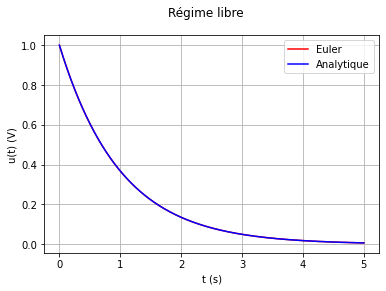

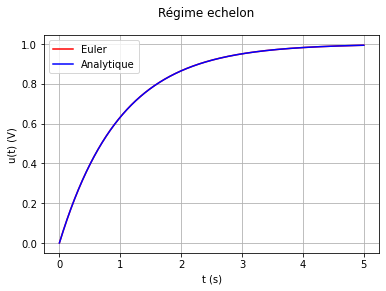

In [2]:
tau = 1


def f_libre(t, y):  # Régime libre, fonction f
    return - y / tau


def f_echelon(t, y):  # Echelon, fonction f
    return (1 - y) / tau


def sol_libre(t, t1, y0):  # Régime libre, solution analytique
    return y0 * np.exp(- (t - t1) / tau)


def sol_echelon(t, t1, y0):  # Echelon, solution analytique
    return (y0 - 1) * np.exp(- (t - t1) / tau) + 1


pas = tau / 1000  # pas d'intégration

t_libre, num_libre = euler(f_libre, pas, 0, 5 * tau, 1)  # Intégration numérique du régime libre
ana_libre = sol_libre(t_libre, 0, 1)  # Solution analytique du régime libre

fl, axl = plt.subplots()  # Création de la fenêtre et des axes
fl.suptitle('Régime libre')  # Titre
axl.set_xlabel('t (s)')  # Légende des abscisses
axl.set_ylabel('u(t) (V)')  # Légende des ordonnées

axl.plot(t_libre, num_libre, label="Euler", color='red')  # Tracé de la solution numérique
axl.plot(t_libre, ana_libre, label="Analytique", color='blue')  # Tracé de la solution analytique
axl.legend()
axl.grid()

t_echelon, num_echelon = euler(f_echelon, pas, 0, 5 * tau, 0)  # Intégration numérique du régime echelon
ana_echelon = sol_echelon(t_echelon, 0, 0)  # Solution analytique du régime echelon

fl, axe = plt.subplots()  # Création de la fenêtre et des axes
fl.suptitle('Régime echelon')  # Titre
axe.set_xlabel('t (s)')  # Légende des abscisses
axe.set_ylabel('u(t) (V)')  # Légende des ordonnées

axe.plot(t_echelon, num_echelon, label="Euler", color='red')  # Tracé de la solution numérique
axe.plot(t_echelon, ana_echelon, label="Analytique", color='blue')  # Tracé de la solution analytique
axe.legend()
axe.grid()

plt.show()

### Erreur et pas d'intégration

> __Exercice 3__
> 1. Reprendre l'exercice précédent mais en affichant deux graphiques (1 colonne et deux lignes) : les solutions analytique et numérique précédentes sur le premier et la valeur absolue des écarts entre les deux solutions sur le second graphique.
> 2. Etudier l'évolution des erreurs en fonction du pas d'intégration (commencer par un pas égal à $\tau$ puis diviser successivement par 5 le pas) et pour un pas d'intégration fixé en fonction du temps.

Pour vous aider sur la manière de tracer une fenêtre multi-graphique, utiliser cet [élément de cours](https://pcsi3physiquestan.github.io/intro_python/notebook/plus_loin.html).

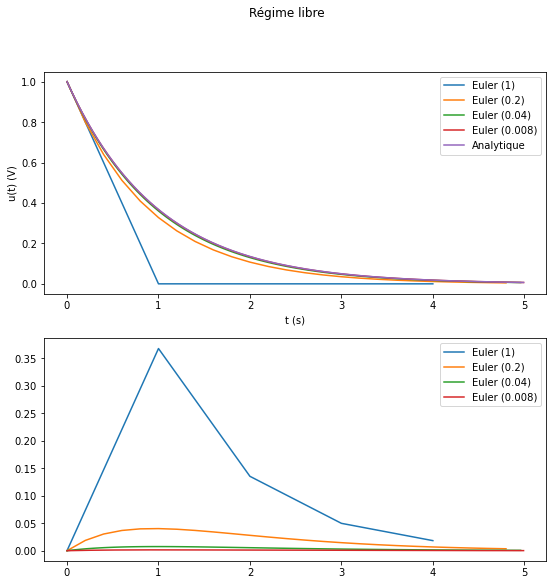

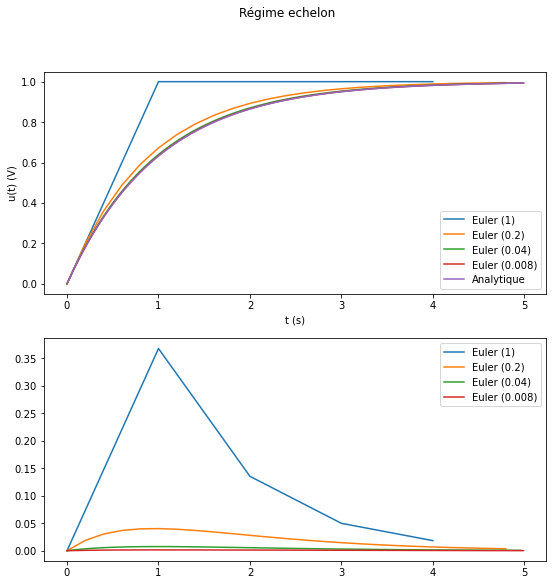

In [3]:
lpas = [tau, tau / 5, tau / 25, tau / 125]


fl, axl = plt.subplots(2, 1, figsize=(9, 9))  # Création de la fenêtre et des axes
fl.suptitle('Régime libre')  # Titre
axl[0].set_xlabel('t (s)')  # Légende des abscisses
axl[0].set_ylabel('u(t) (V)')  # Légende des ordonnées

fl, axe = plt.subplots(2, 1, figsize=(9, 9))  # Création de la fenêtre et des axes
fl.suptitle('Régime echelon')  # Titre
axe[0].set_xlabel('t (s)')  # Légende des abscisses
axe[0].set_ylabel('u(t) (V)')  # Légende des ordonnées


for pas in lpas:
    t_libre, num_libre = euler(f_libre, pas, 0, 5 * tau, 1)  # Intégration numérique du régime libre
    ana_libre = sol_libre(t_libre, 0, 1)  # Solution analytique du régime libre

    axl[0].plot(t_libre, num_libre, label="Euler ({})".format(pas))  # Tracé de la solution numérique
    axl[1].plot(t_libre, np.abs(num_libre - ana_libre), label="Euler ({})".format(pas))  # Tracé des écarts

    t_echelon, num_echelon = euler(f_echelon, pas, 0, 5 * tau, 0)  # Intégration numérique du régime echelon
    ana_echelon = sol_echelon(t_echelon, 0, 0)  # Solution analytique du régime echelon


    axe[0].plot(t_echelon, num_echelon, label="Euler ({})".format(pas))  # Tracé de la solution numérique
    axe[1].plot(t_libre, np.abs(num_echelon - ana_echelon), label="Euler ({})".format(pas))  # Tracé des écarts

axl[0].plot(t_libre, ana_libre, label="Analytique", linestyle='-')  # Tracé de la solution analytique
axe[0].plot(t_echelon, ana_echelon, label="Analytique", linestyle='-')  # Tracé de la solution analytique

axl[0].legend()
axl[1].legend()
axe[0].legend()
axe[1].legend()



plt.show()

__On remarque que plus le pas d'intégration est faible, plus l'intégration est correcte.__

### Rampe de tension

On va aussi réaliser une étude énergétique. Pour cela, il faut calculer l'intensité $i$ par dérivation numérique puis l'énergie par intégration numérique.

#### Dérivation numérique.

On va réaliser une dérivée numérique d'ordre 2. Pour un pas de temps $h$, on peut faire l'approximation de $y(t-h)$ et $y(t+h)$ par :

$$
\begin{cases}
y(t - h) &= y(t) - h \frac{\rm{d}y}{\rm{dt}}(t)\\
y(t + h) &= y(t) + h \frac{\rm{d}y}{\rm{dt}}(t)
\end{cases}
$$

soit par soustraction :
$$
\frac{\rm{d}y}{\rm{dt}}(t) = \frac{y(t+h) - y(t-h)}{2h}
$$

soit pour la suite des $y_k$ (on note la suite des valeurs de la dérivée $i_k$):

$$
i_k = \frac{\rm{d}y}{\rm{dt}}(t_k) = \frac{y_{k+1} - y_{k-1}}{2h}
$$

Seul problème : __on ne peut utiliser cette expression pour calculer la dérivée pour $k=0$ et $k=k_{\max}$__. Pour les deux valeurs extrêmes, on va utiliser l'expression :

$$
\begin{cases}
i_0 &= \frac{y_{1} - y_{0}}{h}\\
i_{k_{\max}} &= \frac{y_{k_{\max}} - y_{k_{\max} - 1}}{h}\\
\end{cases}
$$

> __Exercice 4__
> 1. Définir une fonction `deriv` qui prend comme argument le vecteur `y` des valeurs à dériver et le `pas` de calcul et qui renvoie le vecteur des valeurs dérivées.
> 2. Vérifier son fonctionnement en calculant la dérivée des tensions pour les régimes libre et échelon de tension en traçant leur comparaison avec leurs expressions analytiques.

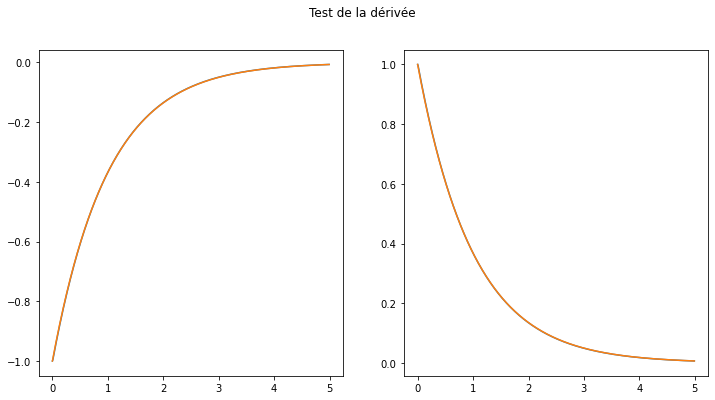

In [4]:
def deriv(y, pas):
    N = len(y)
    dy = np.zeros(N)  # Initialisation du vecteur des dérivées
    dy[0] = (y[1] - y[0]) / pas  # Premier terme
    for i in range(1, N-1):  # On doit s'arrêter à l'indice N-2 pour remplir (pas le dernier terme)
        dy[i] = (y[i + 1] - y[i - 1]) / (2 * pas)
    dy[N - 1] = (y[N - 1] - y[N - 2]) / pas
    return dy


def dsol_libre(t, t1, y0):  # Régime libre, solution analytique
    return - y0 / tau * np.exp(- (t - t1) / tau)


def dsol_echelon(t, t1, y0):  # Echelon, solution analytique
    return - (y0 - 1) / tau * np.exp(- (t - t1) / tau)



dnum_libre = deriv(num_libre, pas)
dana_libre = dsol_libre(t_libre, 0, 1)

dnum_echelon = deriv(num_echelon, pas)
dana_echelon = dsol_echelon(t_echelon, 0, 0)

fd, axd = plt.subplots(1, 2, figsize=(12, 6))
fd.suptitle('Test de la dérivée')
axd[0].plot(t_libre, dnum_libre, label='Dérivée numérique', linestyle='-')
axd[0].plot(t_libre, dana_libre, label='Dérivée analytique')

axd[1].plot(t_echelon, dnum_echelon, label='Dérivée numérique', linestyle='-')
axd[1].plot(t_echelon, dana_echelon, label='Dérivée analytique')

plt.show()

#### Intégration numérique.
On applique la méthode des rectangles pour calculer numériquement l'intégrale de $y(t)$ entre $t_0$ et $t_k$. On note $s_k$ la valeur de cette intégrale et on prend $s_0 = 0$ (l'énergie échangé initialement sera nulle). On définit donc la récurrence :

$$
s_{k+1} = s_k + h * y_k
$$

> __Exercice 5__
> 1. Définir une fonction `integ` qui prend comme argument le vecteur `y` à intégrer et le `pas` de calcul et qui renvoie le vecteur des valeurs intégrées.
> 2. Vérifier son fonctionnement en calculant l'intégrale des tensions pour les régimes libre et échelon de tension en traçant leur comparaison avec leurs expressions analytiques.

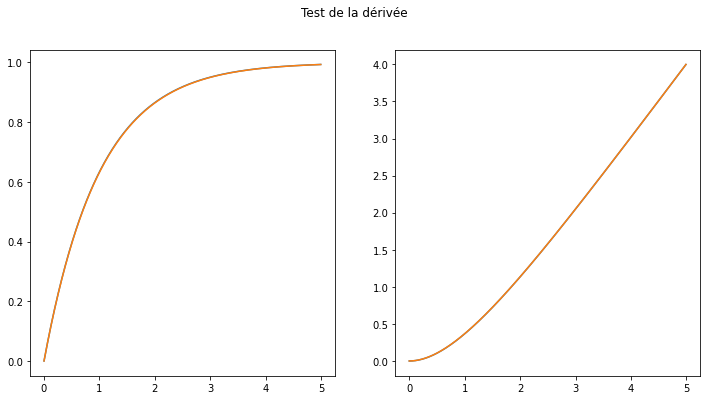

In [5]:
def integ(y, pas):
    N = len(y)
    iy = np.zeros(N)
    iy[0] = 0
    for i in range(1, N):
        iy[i] = iy[i - 1] + pas * y[i - 1]
    return iy


def isol_libre(t, t1, y0):  # Régime libre, solution analytique
    return - tau * y0 * np.exp(- (t - t1) / tau) + tau * y0


def isol_echelon(t, t1, y0):  # Echelon, solution analytique
    return - tau * (y0 - 1) * np.exp(- (t - t1) / tau) + t + tau * (y0 - 1)



inum_libre = integ(num_libre, pas)
iana_libre = isol_libre(t_libre, 0, 1)

inum_echelon = integ(num_echelon, pas)
iana_echelon = isol_echelon(t_echelon, 0, 0)

fi, axi = plt.subplots(1, 2, figsize=(12, 6))
fi.suptitle('Test de la dérivée')
axi[0].plot(t_libre, inum_libre, label='Dérivée numérique', linestyle='-')
axi[0].plot(t_libre, iana_libre, label='Dérivée analytique')

axi[1].plot(t_echelon, inum_echelon, label='Dérivée numérique', linestyle='-')
axi[1].plot(t_echelon, iana_echelon, label='Dérivée analytique')

plt.show()

#### Application à la rampe.
On étudie un circuit RC série soumis à une tension $E(t)$ :

$$
E(t) = 
\begin{cases}
0 & \textrm{si t <= 0}\\
t / T0 & \textrm{si 0 < t <= T0}\\
1 & \textrm{si t > T0}\\
\end{cases}
$$

On prendra $R = 1\rm{k\Omega}; C = 1\rm{\mu F}; T0 = k \tau; u(t=0) = 0 \rm{V}$

> __Exercice 6__
> 1. Procéder à l'intégration de l'équation différentielle en choisissant un pas de calcul adapté pour $k=2$.
> 2. En déduire l'intensité circulant dans le condensateur, l'énergie stockée dans le condensateur (aux mêmes instants $t_k$) et la énergie dissipée par la résistance et l'énergie fournie par la source (entre t=0  et $t=t_k$).
> 3. Représenter quatre graphique dans une même fenêtre (2 lignes, 2 colonnes) représentant :
>     * premier graphique : les tensions $E(t)$ et $u(t)$
>     * deuxième graphique : l'intensité $i(t)$
>     * troisième graphique ; le portrait de phase (ensemble des points de coordonnées ($u(t); \frac{du}{dt}(t)$))
>     * quatrième graphique ; l'évolution de l'énergie stockée dans le condensateur, celle délivrée par la source et celle dissipée par la résistance
> 4. Analyser physiquement les courbes obtenues.
> 5. Reprendre l'étude en augmentant $k$. On commentera notamment l'énergie dissipée par effet Joule.

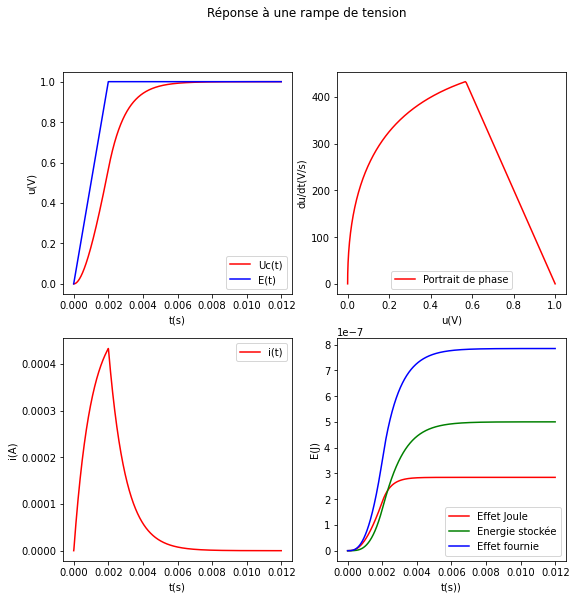

In [6]:
""" On prend un pas de temps égal à tau / 100. L'étude précédente sur le pas
avec des variations temporelles du même ordre monre que ça devrait suffire.
"""

# Données numériques
R = 1e3
C = 1e-6
tau = R * C
k = 2
T0 = k * tau
u0 = 0


# Intégration numérique
pas = tau / 100

def rampe(t):  # Définition de la rampe d'entrée
    if t < 0:
        return 0
    elif t < T0:
        return t / T0
    else:
        return 1


def frampe(t, y):  # Définition de la fonction f pour le schéma d'Euler
    return (rampe(t) - y) / tau

tf = T0 + 10 * tau  # Temps final : On se donne une marge pour observer la fin de la rampe
t_rep, u_rep = euler(frampe, pas, 0, tf, u0)  # Intégration de l'équation

# Calcul des grandeurs associées
du_rep = deriv(u_rep, pas)  # Dérivée de u
i_rep = du_rep * C  # Intensité
EJ_rep = R * integ(i_rep ** 2, pas)  # Energie dissipée par effet Joule
Ec_rep = 1 / 2 * C * u_rep ** 2  # Energie stockée dans C
Ef_rep = EJ_rep + Ec_rep  # Energie fournie par la source

"""
Calcul des valeurs de la rampes aux t_k pour le tracé
La fonction rampe n'est pas vectorialisable (condition if), on utilise une compréhension de liste
pour aller plus vite mais on pourrait écrire une boucle.
"""
u_rampe = np.array([rampe(t) for t in t_rep])

# Tracé graphique
fr, axr = plt.subplots(2, 2, figsize=(9, 9))
fr.suptitle("Réponse à une rampe de tension")

# Evolution temporelle de u(t)
axr[0, 0].set_xlabel("t(s)")
axr[0, 0].set_ylabel("u(V)")

axr[0, 0].plot(t_rep, u_rep, label="Uc(t)", color='red')
axr[0, 0].plot(t_rep, u_rampe, label="E(t)", color='blue', linestyle='-')

axr[0, 0].legend()

# Evolution temporelle de i(t)
axr[1, 0].set_xlabel("t(s)")
axr[1, 0].set_ylabel("i(A)")

axr[1, 0].plot(t_rep, i_rep, label="i(t)", color='red')

axr[1, 0].legend()

# Portrait de phase
axr[0, 1].set_xlabel("u(V)")
axr[0, 1].set_ylabel("du/dt(V/s)")

axr[0, 1].plot(u_rep, du_rep, label="Portrait de phase", color='red')

axr[0, 1].legend()

# Evolution énergétique
axr[1, 1].set_xlabel("t(s))")
axr[1, 1].set_ylabel("E(J)")

axr[1, 1].plot(t_rep, EJ_rep, label="Effet Joule", color='red')
axr[1, 1].plot(t_rep, Ec_rep, label="Energie stockée", color='green')
axr[1, 1].plot(t_rep, Ef_rep, label="Effet fournie", color='blue')

axr[1, 1].legend()

plt.show()

On remarque plus on augmente `k`, plus $U_c(t)$ arrive à suivre $E(t)$ et plus l'intensité est faible : il vient que les pertes par effet Joule sont faible : on transfert presque toutes l'énergie fournie au condensateur. On parlera de transformation quasi-statique.

On va maintenant étudier plus précisément le rapport $\eta$. On assimile ce rapport calculé à l'infini par le même après un temps long soit pour $t = T_0 + 10 * \tau$

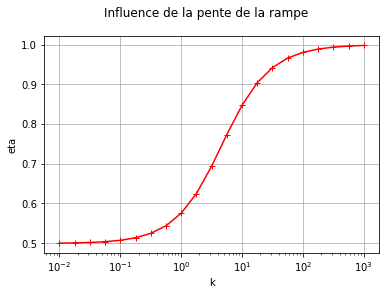

In [7]:
ks = np.logspace(-2, 3, 21)  # On trace sur 4 décades avec 4 points par décade.
etas = []  # Liste où on stocke les rendements

for k in ks:
    T0 = k * tau
    u0 = 0


    # Intégration numérique
    pas = tau / 100

    def rampe(t):  # Définition de la rampe d'entrée
        if t < 0:
            return 0
        elif t < T0:
            return t / T0
        else:
            return 1


    def frampe(t, y):  # Définition de la fonction f pour le schéma d'Euler
        return (rampe(t) - y) / tau

    tf = T0 + 10 * tau  # Temps final : On se donne une marge pour observer la fin de la rampe
    t_rep, u_rep = euler(frampe, pas, 0, tf, u0)  # Intégration de l'équation

    # Calcul des grandeurs associées
    du_rep = deriv(u_rep, pas)  # Dérivée de u
    i_rep = du_rep * C  # Intensité
    EJ_rep = R * integ(i_rep ** 2, pas)  # Energie dissipée par effet Joule
    Ec_rep = 1 / 2 * C * u_rep ** 2  # Energie stockée dans C
    Ef_rep = EJ_rep + Ec_rep  # Energie fournie par la source
    eta = Ec_rep[-1] / Ef_rep[-1]
    etas.append(eta)

etas = np.array(etas)

f, ax = plt.subplots()
f.suptitle('Influence de la pente de la rampe')
ax.set_xlabel('k')
ax.set_ylabel('eta')
ax.set_xscale('log')

ax.plot(ks, etas, label="eta(k)", color='red', marker='+')
ax.grid()
plt.show()

On remarque comme attendu qu'on tend vers un rendement qui vaut 1. On observe aussi une nette augmentation du rendement quand la durée de la rampe devient supérieure au temps caractéristique. On pourra donc se contenter de $T_0 = 10 \tau$ de manière à avoir un rendement supérieur à 80%.